In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

**Data Collections and Processing**

In [2]:

calories = pd.read_csv('/content/calories.csv')

In [3]:

calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [4]:
exercise_data = pd.read_csv('/content/exercise.csv')

In [5]:
exercise_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


**Combining the two Dataframes**

In [6]:
calories_data = pd.concat([exercise_data, calories['Calories']], axis=1)

In [7]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [8]:
calories_data.shape

(15000, 9)

NO EDA Required

In [9]:
# getting some informations about the data
calories_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


**Data Analysis**

In [10]:
calories_data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


**Data Visualization**

In [11]:
sns.set()

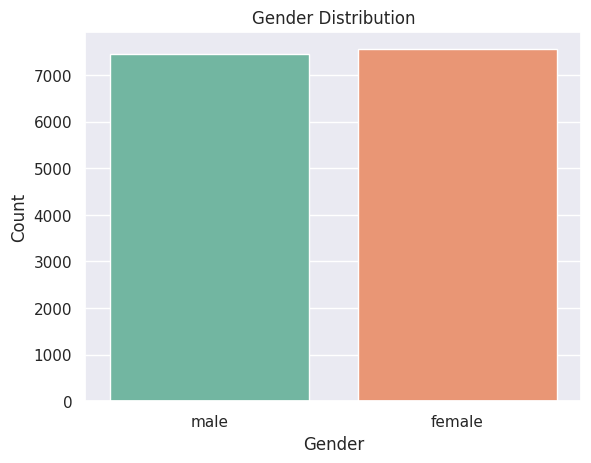

In [16]:
# plotting the gender column in count plot
sns.countplot(x="Gender", hue="Gender", data=calories_data, palette="Set2", legend=False)
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

Almost equal amount of distribution between data points.

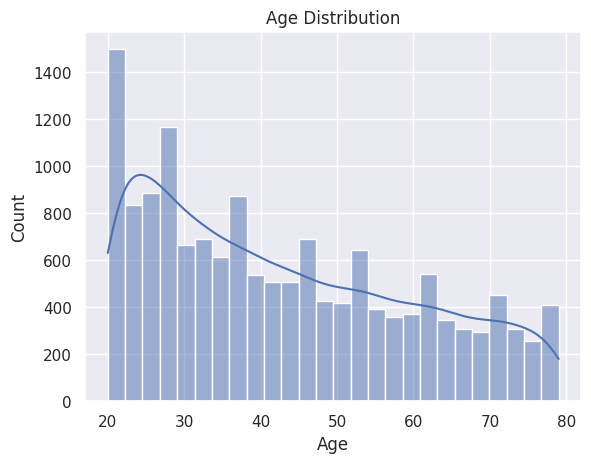

In [19]:
sns.histplot(calories_data['Age'], kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

More amount of datapoints are present in between range 20 and 30.

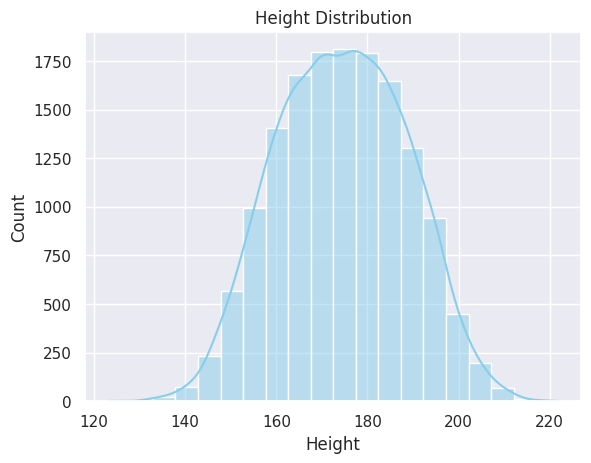

In [20]:
sns.histplot(calories_data['Height'], kde=True, bins=20, color="skyblue")
plt.title("Height Distribution")
plt.xlabel("Height")
plt.ylabel("Count")
plt.show()

Normal distribution as more number of heights are there in range 140 to 180.

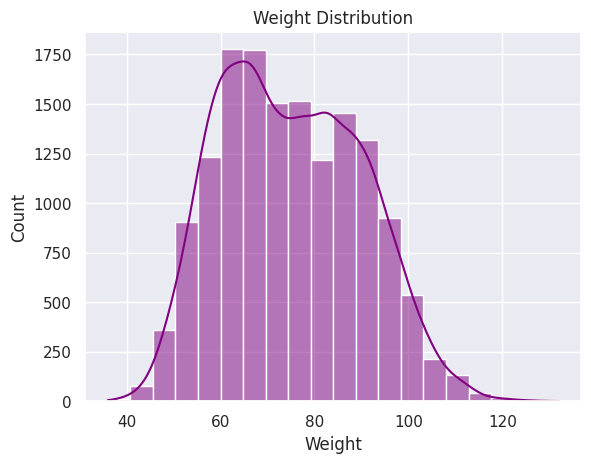

In [21]:
sns.histplot(calories_data['Weight'], kde=True, bins=20, color="purple")
plt.title("Weight Distribution")
plt.xlabel("Weight")
plt.ylabel("Count")
plt.show()

**Finding the Correlation in the dataset**

1. Positive Correlation
2. Negative Correlation

In [23]:
#For machine learning model to understand convert the male -> 0 and female -> 1
calories_data['Gender'] = calories_data['Gender'].map({'male': 0, 'female': 1})
correlation = calories_data.corr()

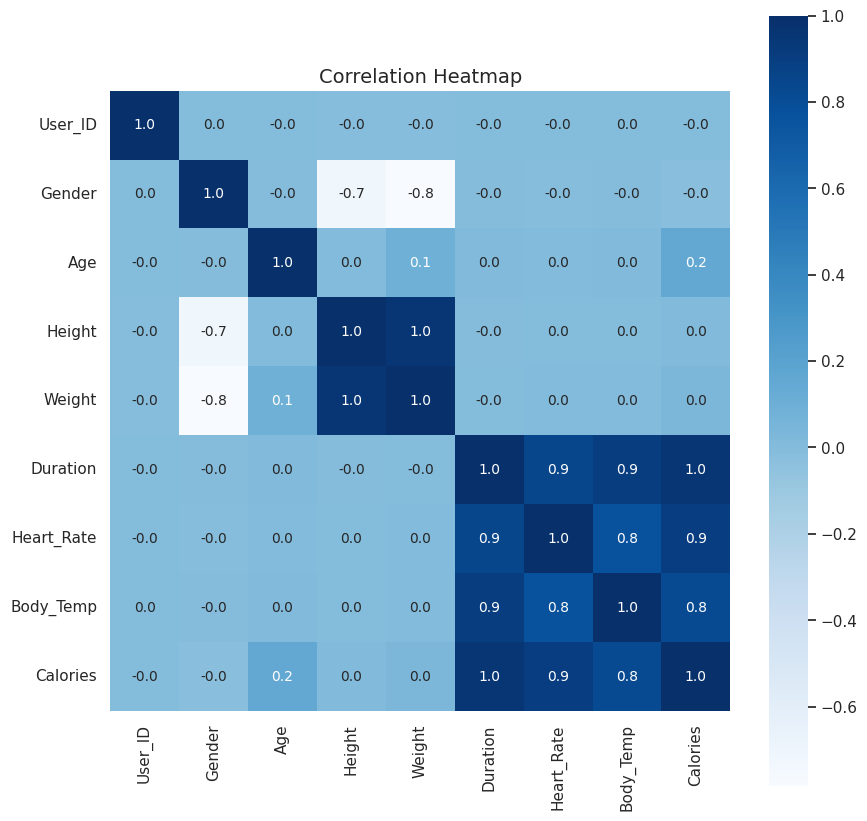

In [24]:
# constructing a heatmap to understand the correlation
plt.figure(figsize=(10, 10))
sns.heatmap(
    correlation,
    cbar=True,
    square=True,
    fmt=".1f",
    annot=True,
    annot_kws={"size": 10},
    cmap="Blues"
)
plt.title("Correlation Heatmap", fontsize=14)
plt.show()

In [25]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


**Separating features and Target**

In [26]:
X = calories_data.drop(columns=['User_ID','Calories'], axis=1)
Y = calories_data['Calories']

In [27]:
print(X)

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0           0   68   190.0    94.0      29.0       105.0       40.8
1           1   20   166.0    60.0      14.0        94.0       40.3
2           0   69   179.0    79.0       5.0        88.0       38.7
3           1   34   179.0    71.0      13.0       100.0       40.5
4           1   27   154.0    58.0      10.0        81.0       39.8
...       ...  ...     ...     ...       ...         ...        ...
14995       1   20   193.0    86.0      11.0        92.0       40.4
14996       1   27   165.0    65.0       6.0        85.0       39.2
14997       1   43   159.0    58.0      16.0        90.0       40.1
14998       0   78   193.0    97.0       2.0        84.0       38.3
14999       0   63   173.0    79.0      18.0        92.0       40.5

[15000 rows x 7 columns]


In [28]:
print(Y)

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64


**Splitting the data into training data and Test data**

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [30]:
print(X.shape, X_train.shape, X_test.shape)

(15000, 7) (12000, 7) (3000, 7)


**Model Training**


XgBoost Regressor

In [34]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import RandomizedSearchCV

xgb = XGBRegressor(objective='reg:squarederror', random_state=2)

In [35]:
#Define parameter space (wider than GridSearch for RandomizedSearch)
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 9],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}


In [36]:
#RandomizedSearchCV (faster than GridSearch)
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=20,             # number of random combos to try
    scoring='r2',          # optimize for R2
    cv=5,
    verbose=2,
    random_state=2,
    n_jobs=-1
)

In [37]:
#Fit on training data
random_search.fit(X_train, Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          feature_weights=None, gamma=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraint...
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None, ...),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [3, 5, 7, 9],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=2, scoring='r2', verbose=2)

In [ ]:
print("Best Parameters:", random_search.best_params_)
print("Best CV Score:", random_search.best_score_)

**Train Best Model & Predict**

In [39]:
# Train the best model
best_xgb = random_search.best_estimator_
best_xgb.fit(X_train, Y_train)

# Predictions
y_pred = best_xgb.predict(X_test)

# Evaluation
r2 = r2_score(Y_test, y_pred)
mse = mean_squared_error(Y_test, y_pred)
rmse = np.sqrt(mse)

print("Test R2 Score:", r2)
print("Test RMSE:", rmse)

Test R2 Score: 0.9994267168164771
Test RMSE: 1.5005490653621907


In [41]:
test_data_prediction = best_xgb.predict(X_test)

In [43]:
print(test_data_prediction[:10])   # show first 10 predictions

[127.934586 221.33159   37.410206   6.277421 135.62262   27.046255
  59.948837  58.024765 108.39596   29.920834]


In [44]:
# Evaluation
mae = metrics.mean_absolute_error(Y_test, test_data_prediction)
mse = metrics.mean_squared_error(Y_test, test_data_prediction)
rmse = np.sqrt(mse)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 1.0398579117792348
Mean Squared Error (MSE): 2.251647497559344
Root Mean Squared Error (RMSE): 1.5005490653621907
